# Plotting the Kernel Density Estimate of M-17 ice accumulation phase

In [1]:
cd ..

/Users/AchilleTalon/Documents/GitHub/ice-accummulation-M17


In [2]:
try:
    import simplejson as json
except (ImportError,):
    import json

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.gridspec import GridSpec

In [4]:
import scripts.OxcalReader as ox

In [5]:
# define some nice colour palette to use further on.
colors = sns.palettes.color_palette('colorblind',n_colors=10)

In [6]:
M17 = ox.ReadFile('data/age_model/M17_KDE.json')

In [7]:
kde_M17  = M17['ocd'][1]   # the kernel density object
start_M17 = M17['ocd'][6]  # boundary object
end_M17 = M17['ocd'][-1]  # boundary object

In [8]:
# reading the floods proxy data.
floods = pd.read_table('data/proxies/Alps_flood.tab',sep='\t',header=9)

# rename the columns
floods.columns = ['age','n_alps','s_alps']

# change age scale to AD
floods['age_AD'] = 1950-1000*floods['age']

In [9]:
# read total solar irradiance data
nao = pd.read_csv('data/proxies/Hernandez_NAO.tab',sep = '\t',header = 18)

nao_pre = nao.where(nao["Age [a AD]"]<1200).dropna()
nao_post = nao.where(nao["Age [a AD]"]>1280).dropna()

In [10]:
# read palaeo-NAO index from Hernandez 2020
tsi = pd.read_csv('data/proxies/TSI_steinhilber_2009.tab',sep = '\s\s', engine = 'python')

# change age scale to AD
tsi['age_AD'] = 1950 - tsi['year_BP']

In [83]:
def plotTSI(ax):
    
    # plot the data
    ax.plot(tsi['age_AD'].to_numpy(),tsi['dTSI'].to_numpy(),label = '$\Delta$TSI',color = colors[3])
    ax.fill_between(tsi['age_AD'].to_numpy(),y1=tsi['dTSI'].to_numpy()-tsi['dTSI_sigma'].to_numpy(),
                    y2 = tsi['dTSI'].to_numpy()+ tsi['dTSI_sigma'].to_numpy(),
                    label = 'TSI',facecolor=colors[3],alpha = 0.25)
    ax.axhline(y=0,color = 'black', lw = 0.5,ls = '--')
    # ax limits
    ax.set_xlim(400,2000)
    
    # spine visibility
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # axis labels and ticks
    ax.xaxis.set_ticklabels([])
    ax.xaxis.set_tick_params(bottom=False)
    ax.set_ylabel("$\Delta$TSI (W.m$^{-2}$)\n(Steinhilber et al., 2009)",**{'size':8})
    
    return ax

In [84]:
def plotNAO(ax):
    
    #loop over the two sections.
    # plot the data
    for nao in (nao_pre,nao_post):
        
        ax.plot(nao['Age [a AD]'].to_numpy(),nao['NAO (median NAO value)'].to_numpy(),label = 'NAO',color = colors[0])
        #
        ax.fill_between(nao['Age [a AD]'].to_numpy(),y1=nao['Uncertainty [±] (high limit of the 50% of unce...)'].to_numpy(),
                    y2 = nao['Uncertainty [±] (low limit of the 50% of uncer...)'].to_numpy(),
                    label = 'NAO',facecolor=colors[0],alpha = 0.25)
        ax.fill_between(nao['Age [a AD]'].to_numpy(),y1=nao['Uncertainty [±] (high limit of the 95% of unce...)'].to_numpy(),
                    y2 = nao['Uncertainty [±] (low limit of the 95% of uncer...)'].to_numpy(),
                    label = 'NAO',facecolor=colors[0], alpha = 0.25)


    ax.axhline(y=0,color = 'black', lw = 0.5,ls = '--')
    # ax limits
    ax.set_xlim(400,2000)
    
    # spine visibility
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # axis labels and ticks
    ax.xaxis.set_ticklabels([])
    ax.xaxis.set_tick_params(bottom=False)
    ax.set_ylabel("NAO index\n(Hernández et al., 2020)",**{'size':8})
    
    return ax

In [85]:
def plotFloods(ax):
    
    # plot the data for northern and southern alps
    ax.plot(floods['age_AD'].to_numpy(),floods['s_alps'].to_numpy(),color = colors[0], label = 'S Alps')
    ax.plot(floods['age_AD'].to_numpy(),floods['n_alps'].to_numpy(),color = colors[3],label = 'N Alps')
    
    # axis limits
    ax_flood.set_xlim(400,2000)
    
    # spine visibility
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # axis ticks and labels
    ax.xaxis.set_ticklabels([])
    ax.xaxis.set_tick_params(bottom=False)
    ax.set_ylabel("flood frequency (%)\n(Wirth et al., 2013)",**{'size':8})
    
    ax.annotate("S Alps",(850,90),(800,90),ha = 'right',arrowprops=dict(arrowstyle="-",color = colors[0],lw = 1.5),va = 'center')
    ax.annotate("N Alps",(650,90),(600,90),ha = 'right',arrowprops=dict(arrowstyle="-",color = colors[3],lw = 1.5),va = 'center')

    return ax

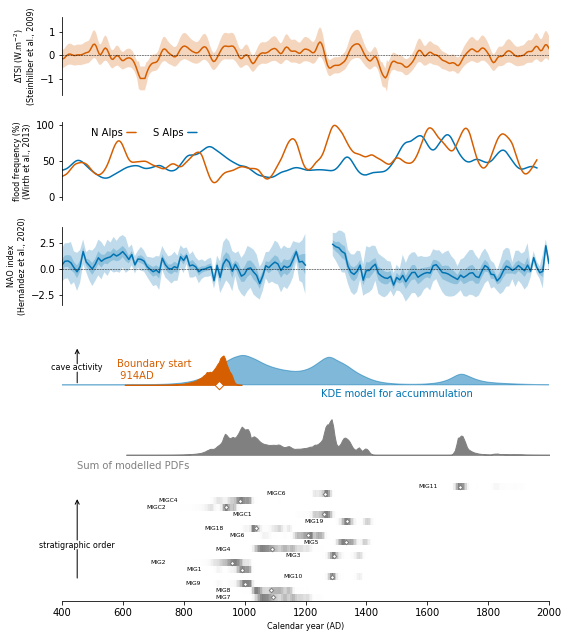

In [86]:
fig = plt.figure( figsize = (8,9))

gs = GridSpec(6, 1, height_ratios=[1,1,1, 0.75, 0.5, 1.5])


# proxy total solar irradiance
ax_tsi = fig.add_subplot(gs[0])
plotTSI(ax_tsi) 

# Proxy floods
ax_flood = fig.add_subplot(gs[1])
plotFloods(ax_flood)

# Proxy NAO
ax_NAO = fig.add_subplot(gs[2])
plotNAO(ax_NAO)

# KDE plotting

ax1 = fig.add_subplot(gs[3])

# plot KDE model with boundaries
KDE_plot,med = ox.FillBetween(ax1,kde_M17,color = colors[0],**{'alpha':0.5})
ax1.text(1250,-0.2,'KDE model for accummulation', color =colors[0])
ax1.set_ylim(0,2)

ax1.text(450,0.8,"cave activity",size = 8,ha='center',va = 'center')
ax1.annotate("",(450,1.5),(450,0.85), arrowprops=dict(arrowstyle="->"))
ax1.annotate("",(450,0.7),(450,0.2), arrowprops=dict(arrowstyle="-"))


s_plot,s_med = ox.FillBetween(ax1,start_M17,median=True,color = colors[3])

ax1.text(580,0.4,'Boundary start\n {:.0f}AD'.format(s_med), color =colors[3])

ax4 = fig.add_subplot(gs[4])
sum_m17 = ox.FillBetween(ax4,M17['ocd'][4],color = 'grey')
ax4.text(450,-0.2,'Sum of modelled PDFs', color ='grey')


# plot the simplified PDFs.
ax3 = fig.add_subplot(gs[5])

for c,date in enumerate(M17['ocd'][8:-1]): 
    d = ox.MakeRects(ax3,date,c,facecolor = 'grey')
    ax3.text(date['posterior']['start']-20,c+0.5,s=date['name'],size = 6,va='center', ha = 'right')
    ax3.scatter([float(date['posterior']['median'])],[c+0.5],marker ='D',facecolor = 'white',edgecolor='grey',s=10,zorder = 100)

ax3.text(450,8,"stratigraphic order",size = 8,ha='center',va = 'center')
ax3.annotate("",(450,15),(450,8.5), arrowprops=dict(arrowstyle="->"))
ax3.annotate("",(450,7.7),(450,3), arrowprops=dict(arrowstyle="-"))

ax3.set_xlabel('Calendar year (AD)',**{'size':8})

ax3.set_ylim(0,17)

for ax in (ax1,ax4):
    ax.spines['bottom'].set_visible(False)
    ax.xaxis.set_ticklabels([])
    ax.xaxis.set_tick_params(bottom=False)

for ax in (ax1,ax3,ax4):
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticklabels([])
    ax.yaxis.set_tick_params(left=False)
    ax.set_xlim(400,2000)
    
plt.tight_layout()
plt.savefig('outputs/age_model.pdf',dpi = 300)
plt.show()